# Final Project: Analysis of Global Agricultural Productivity Indicators

By Farjana Anwerbasha 

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This script used To Disable Auto scroll of Jupyter notebook's output cells.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from io import StringIO
from tabulate import tabulate
from datetime import datetime
start=datetime.now()
eta=datetime.now()

## *Introductory Procedures*

### Reading Files

In [3]:
gdp_nations=pd.read_csv(r'C:\Users\mahre\Desktop\project\Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv', encoding = "ISO-8859-1",usecols=['Area Code','Area','Element Code','Item Code','Year','Unit','Value'])
population_nations=pd.read_csv(r'C:\Users\mahre\Desktop\project\Population_E_All_Data_(Normalized).csv', encoding = "ISO-8859-1",usecols=['Area Code','Area','Element Code','Year','Value'])
production_index_nations=pd.read_csv(r'C:\Users\mahre\Desktop\project\Production_Indices_E_All_Data_(Normalized).csv', encoding = "ISO-8859-1",usecols=['Area Code','Area','Element Code','Item Code','Year','Value'])
gov_expenditure=pd.read_csv(r'C:\Users\mahre\Desktop\project\Investment_GovernmentExpenditure_E_All_Data_(Normalized).csv', encoding = "ISO-8859-1",usecols=['Area Code','Area','Element Code','Item Code','Year','Value'])
food_aid=pd.read_csv(r'C:\Users\mahre\Desktop\project\Food_Aid_Shipments_WFP_E_All_Data_(Normalized).csv', encoding = "ISO-8859-1",usecols=['Recipient Country Code','Recipient Country','Donor Country Code','Year','Value'])
emp_data=pd.read_csv(r'C:\Users\mahre\Desktop\project\Employment_Indicators_E_All_Data_(norm).csv',encoding = "ISO-8859-1", usecols=['Country Code','Country','Indicator Code','Indicator','Year','Unit','Value'])
prod_crop=pd.read_csv(r'C:\Users\mahre\Desktop\project\CommodityBalances_Crops_E_All_Data_(Normalized).csv',encoding = "ISO-8859-1", usecols=['Area Code','Element','Item','Year','Unit','Value'])
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()


  Time Elapsed for the Cell :  0:00:08.502938 - seconds





Here we read all the necessary csv files as Pandas DataFrames to prepare for the analysis.

### Filtering the Data 

In [4]:
filt_gdp_nations=gdp_nations[(gdp_nations['Item Code']==22008)&(gdp_nations['Element Code']==6110)& (gdp_nations['Year']>=2008)& (gdp_nations['Year']<=2013 )&(gdp_nations['Area Code']<=300)]
filt_population_nations=population_nations[(population_nations['Element Code']==511)& (population_nations['Year']>=2008)&(population_nations['Year']<=2013 )&(population_nations['Area Code']<=300)]
filt_agricultural_index_nations=production_index_nations[(production_index_nations['Item Code']==2051)& (production_index_nations['Element Code']==432)& (production_index_nations['Year']>=2008)&(production_index_nations['Year']<=2013 )&(production_index_nations['Area Code']<=300)]
filt_gov_expenditure=gov_expenditure[(gov_expenditure['Element Code']==6110)&(gov_expenditure['Year']>=2008) & (gov_expenditure['Year']<=2013 )&(gov_expenditure['Item Code']== 23130)&(gov_expenditure['Area Code']<=300)]
filt_food_aid=food_aid[(food_aid['Donor Country Code']==500)&(food_aid['Year']>=2008) & (food_aid['Year']<=2013 )&(food_aid['Recipient Country Code']<=300)]
filt_emp= emp_data[(emp_data['Indicator'] == 'Employment in agriculture') & ( emp_data['Year'] >= 2008) & (emp_data['Unit'] == '1000 persons')]
filt_emp_male= emp_data[(emp_data['Indicator'] == 'Employment in agriculture, male') & ( emp_data['Year'] >= 2008) & (emp_data['Unit'] == '1000 persons')]
filt_emp_female= emp_data[(emp_data['Indicator'] == 'Employment in agriculture, female') & ( emp_data['Year'] >= 2008) & (emp_data['Unit'] == '1000 persons')]
filt_prod_crop= prod_crop[(prod_crop['Area Code'] == 231) & ( prod_crop['Year'] >= 2008) &( prod_crop['Element'] == 'Production')]
filt_element= prod_crop[(prod_crop['Area Code'] == 231) & ( prod_crop['Year'] >= 2008) ]
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()


  Time Elapsed for the Cell :  0:00:00.813242 - seconds





Here we filter each DataFrame according to the variables needed for the analysis within the analysis period, which is 2008-2013. 

### Function for Sub-Plot

In [5]:
def plot(i):
    plt.rcParams["figure.figsize"] =(20,10)
    if i==0:
        plt.figure(figsize=(12, 6))
    if i==1:
        plt.subplot(2,2,1)
        plt.subplots_adjust(hspace = 0.5)
    elif i==2:
        plt.subplot(2,2,2)
        plt.subplots_adjust(hspace = 0.5)
    elif i==3:
        plt.subplot(2,2,3)
        plt.subplots_adjust(hspace = 0.01)
    elif i==4:
        plt.subplot(2,2,4)
        plt.subplots_adjust(hspace = 0.4)



Here we define the subplot that we want to use later in a function, so that we can call it anywhere during the analysis to help us illustrate our findings.


### Plot Function

In [6]:
def graph(dataname,title,xtitle,ytitle,i):
    plot(i)
    x_labels = [val[1] for val in dataname];y_labels = [val[0] for val in dataname]
    ax = pd.Series(y_labels).plot(kind='bar')
    ax.set_xticklabels(x_labels, rotation=15, ha="right", fontsize=12)
    plt.title(title, fontsize = 25, color='red')
    plt.xlabel(xtitle, fontsize=18);plt.ylabel(ytitle, fontsize=20)
    ax.xaxis.get_offset_text().set_visible(False)
    ax.yaxis.get_offset_text().set_visible(False)
    rects = ax.patches
    for rect, label in zip(rects, y_labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 4, label, ha='center', va='top',fontsize=15,rotation=20)



Here we create a function to define the plot we will use in describing our findings.


## *Analysis*


### Question 1: 

#### *Does the agricultural productivity of a nation appear to be correlated with the GDP per capita of that nation in US dollars?*



In [7]:
uniq_area=filt_gdp_nations['Area'].unique()
gdp_per_capita=[]
for item in uniq_area:
    average_gdp=0;average_population=0
    sum_gdp,count_gdp=filt_gdp_nations[filt_gdp_nations["Area"]==item] .sum()["Value"],filt_gdp_nations[filt_gdp_nations["Area"]==item] .count()["Value"]
    if sum_gdp !=0  : average_gdp=(sum_gdp)*1000000/count_gdp
    sum_population,count_population=filt_population_nations[filt_population_nations["Area"]==item] .sum()["Value"],filt_population_nations[filt_population_nations["Area"]==item] .count()["Value"]
    if sum_population !=0: average_population=(sum_population)*1000/count_population
    if average_gdp>=1 and average_population>=1:
        per_capita=average_gdp/average_population
        gdp_per_capita.append((int(per_capita),item))
top05_gdp_per_capita=sorted(gdp_per_capita,reverse=True)[:5]
bottom05_gdp_per_capita=sorted(gdp_per_capita,reverse=True)[-5:]
print('    Top 5 Countries with Highest GDP per capita ','  |','      GDP per Capita ',"\n","-------------------------------------------------------------------------")
for line in top05_gdp_per_capita:
    print('\t','{:41}'' |    ''{:10}''  US $'.format(line[1],line[0]))
print('\n',' Bottom 5 Countries with Lowest GDP per capita ','  |','      GDP per Capita ',"\n","-------------------------------------------------------------------------")
for line in bottom05_gdp_per_capita:
    print('\t','{:41}'' |    ''{:10}''  US $'.format(line[1],line[0]))
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()

    Top 5 Countries with Highest GDP per capita    |       GDP per Capita  
 -------------------------------------------------------------------------
	 Liechtenstein                             |        162657  US $
	 Monaco                                    |        160143  US $
	 Luxembourg                                |        108857  US $
	 Norway                                    |         95099  US $
	 Bermuda                                   |         91046  US $

  Bottom 5 Countries with Lowest GDP per capita    |       GDP per Capita  
 -------------------------------------------------------------------------
	 Niger                                     |           372  US $
	 Democratic Republic of the Congo          |           372  US $
	 Liberia                                   |           343  US $
	 Burundi                                   |           232  US $
	 Somalia                                   |           128  US $

  Time Elapsed for the Cell :  0:00:

First, we needed to create a list of unique nations to find out the GDP of every nation. We then needed to extract the total number of values of each nation over the duration of our analysis period and divide the GDP by this count to determine the average GDP for each nation over the analysis period.  

We followed a simliar process to determine the total population of each nation for each year in the analysis period and then calculated the average population for each country during this period. 

Next, we derived the per capita GDP by dividing the average GDP for each country by its average population for the period. In other words, we used the equation "Average GDP 2008-2013"/"Average Population 2008-2013" to determine the GDP per capita for each country during this period and appended these figures to a list.

Lastly, we sorted the list to extract and print both the top 5 and bottom 5 per capita GDPs.

In [8]:
top_bottom_nations=top05_gdp_per_capita+bottom05_gdp_per_capita
production_index=[]
for item in top_bottom_nations:
    average_production_index=0
    sum_production_index,count_production_index=filt_agricultural_index_nations[filt_agricultural_index_nations["Area"]==item[1]] .sum()["Value"],filt_agricultural_index_nations[filt_agricultural_index_nations["Area"]==item[1]] .count()["Value"]
    if sum_production_index !=0  : average_production_index=sum_production_index/count_production_index
    production_index.append((int(average_production_index),item[1]))
top05_production_index=production_index[:5]
bottom05_production_index=production_index[-5:]
print(' Analysing "Gross Domestic Product (GDP)" of each countries Vs "Agricultural Production Index" of the same')
print('\n','Countires with "High GDP per capita"   ','    |','Agricultural Production Index in $ ',"\n","--------------------------------------------------------------------------------------")
for line in top05_production_index:
    print('\t','{:35}'' |  ''{:10}''  US $ per capita'.format(line[1],line[0]))
print('\n','Countires with "Low GDP per capita"   ','     |','Agricultural Production Index in $ ',"\n","--------------------------------------------------------------------------------------")
for line in bottom05_production_index:
    print('\t','{:35}'' |  ''{:10}''  US $ per capita'.format(line[1],line[0]))
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()

 Analysing "Gross Domestic Product (GDP)" of each countries Vs "Agricultural Production Index" of the same

 Countires with "High GDP per capita"        | Agricultural Production Index in $  
 --------------------------------------------------------------------------------------
	 Liechtenstein                       |         100  US $ per capita
	 Monaco                              |           0  US $ per capita
	 Luxembourg                          |          96  US $ per capita
	 Norway                              |         101  US $ per capita
	 Bermuda                             |         112  US $ per capita

 Countires with "Low GDP per capita"         | Agricultural Production Index in $  
 --------------------------------------------------------------------------------------
	 Niger                               |         135  US $ per capita
	 Democratic Republic of the Congo    |         107  US $ per capita
	 Liberia                             |         107  US $ per ca



We then applied the same process to extract the annual value of the "Agricultural Production Index" (API) for each of these nations and derived the averages of these indices for the analysis period and appended them to a list. We then printed the results for the countries identified above.



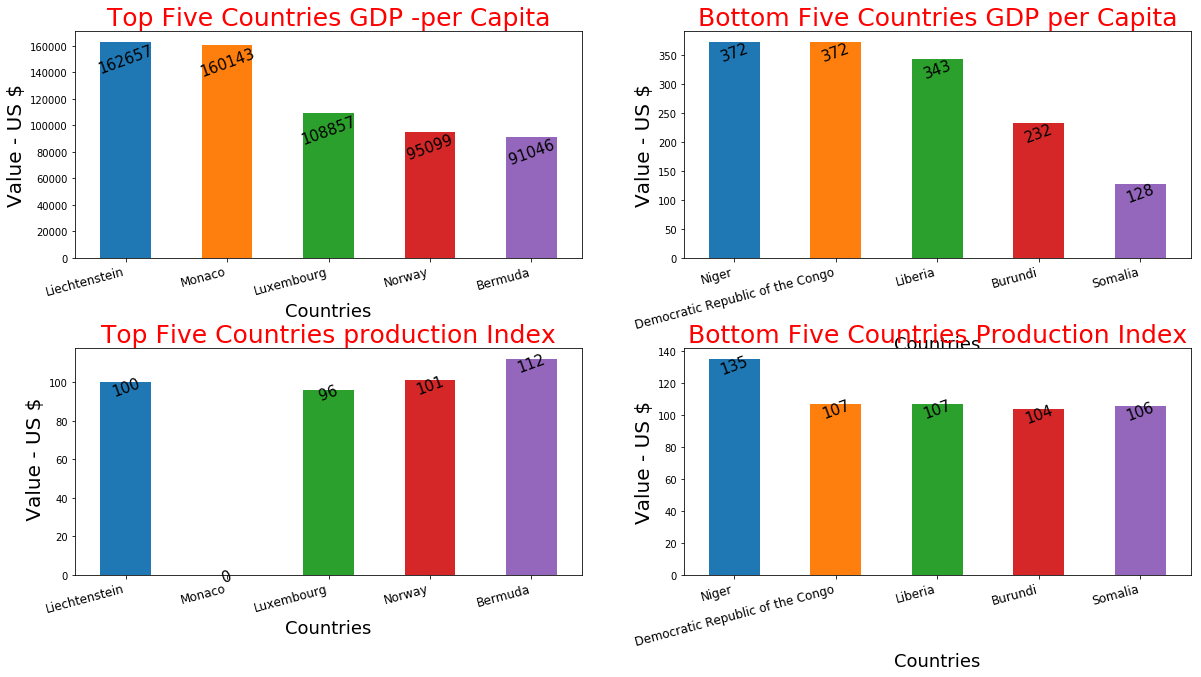

In [9]:
x=['Top Five Countries GDP -per Capita','Bottom Five Countries GDP per Capita','Top Five Countries production Index','Bottom Five Countries Production Index']
graph(top05_gdp_per_capita,x[0],'Countries','Value - US $',1)
graph(bottom05_gdp_per_capita,x[1],'Countries','Value - US $',2)
graph(top05_production_index,x[2],'Countries',' Value - US $',3)
graph(bottom05_production_index,x[3],'Countries','Value - US $',4)


When viewing the plots of the data, we can see that there does not seem to be a clear correlation, either positively or negatively, between a nation's GDP per capita and that nation's agricultural production index.




## Question 2:


#### *Does the percent of a nation's government expenditure outlay appear to affect the agricultural productivity of a nation?*


In [10]:
expenditure_per_capita_list=[]
for item in uniq_area:
    average_gov_expenditure=0; average_population_expenditure=0
    sum_gov_expenditure,count_gov_expenditure=filt_gov_expenditure[filt_gov_expenditure["Area"]==item] .sum()["Value"],filt_gov_expenditure[filt_gov_expenditure["Area"]==item] .count()["Value"]
    if sum_gov_expenditure !=0  : average_gov_expenditure=(sum_gov_expenditure)*1000000/count_gov_expenditure
    sum_population_expenditure,count_population_expenditure=filt_population_nations[filt_population_nations["Area"]==item] .sum()["Value"],filt_population_nations[filt_population_nations["Area"]==item] .count()["Value"]
    if sum_population_expenditure !=0 : average_population_expenditure=(sum_population_expenditure)*1000/count_population_expenditure
    if average_gov_expenditure>=1 and average_population_expenditure>=1:
        expenditure_per_capita=average_gov_expenditure/average_population_expenditure
        expenditure_per_capita_list.append((int(expenditure_per_capita),item))
top05_expenditure_per_capita=sorted(expenditure_per_capita_list,reverse=True)[:5]
bottom05_expenditure_per_capita=sorted(expenditure_per_capita_list,reverse=True)[-5:]
print('    Top 5 Countries - Expenditure per capita ','     |','   Expenditure per Capita ',"\n","------------------------------------------------------------------------------")
for line in top05_expenditure_per_capita:
    print('\t','{:41}'' |    ''{:10}''  US $'.format(line[1],line[0]))
print('\n',' Bottom 5 Countries - Expenditure per capita ','    |','   Expenditure per Capita',"\n","---------------------------------------------------------------------------------")
for line in bottom05_expenditure_per_capita:
    print('\t','{:41}'' |    ''{:10}''  US $'.format(line[1],line[0]))
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()

    Top 5 Countries - Expenditure per capita       |    Expenditure per Capita  
 ------------------------------------------------------------------------------
	 Luxembourg                                |         46511  US $
	 Norway                                    |         40843  US $
	 Denmark                                   |         33316  US $
	 Sweden                                    |         28335  US $
	 Finland                                   |         26612  US $

  Bottom 5 Countries - Expenditure per capita      |    Expenditure per Capita 
 ---------------------------------------------------------------------------------
	 Mozambique                                |           109  US $
	 El Salvador                               |            99  US $
	 Liberia                                   |            71  US $
	 Bangladesh                                |            70  US $
	 Guinea-Bissau                             |            67  US $

  Time Elapsed


Following a process similar to the one outlined above in Question 1, we extracted the total values of 'Government Expenditure' for all nations during the period and determined the average government expenditure outlay for each nation during the period.

We once again extracted the population data for each nation and divided the government expenditure data for the period by that of the population data to determine the government outlay per capita. 

Finally, we appended these figures to a list and sorted the list to determine the top and bottom 5 national government expenditure outlays in agriculture and printed these findings.


In [11]:
top_bottom_expenditure=top05_expenditure_per_capita+bottom05_expenditure_per_capita
production_index=[]
for item in top_bottom_expenditure:
    average_production_index=0
    sum_production_index,count_production_index=filt_agricultural_index_nations[filt_agricultural_index_nations["Area"]==item[1]] .sum()["Value"],filt_agricultural_index_nations[filt_agricultural_index_nations["Area"]==item[1]] .count()["Value"]
    if sum_production_index !=0  : average_production_index=sum_production_index/count_production_index
    production_index.append((int(average_production_index),item[1]))
top05_agricultural_index=production_index[:5]
bottom05_agricultural_index=production_index[-5:]
print(' Analysing "Expenditure per Capita" of each counties Vs "Agricultural Production Index" of the same')
print('\n','Countires with "High Expenditure per capita"   ',' |','Agricultural Production Index in $ ',"\n","--------------------------------------------------------------------------------------")
for line in top05_agricultural_index:
    print('\t','{:35}''      |    ''{:10}''  US $ per capita'.format(line[1],line[0]))
print('\n','Countires with "Low Expenditure per capita"   ','  |','Agricultural Production Index in $ ',"\n","--------------------------------------------------------------------------------------")
for line in bottom05_agricultural_index:
    print('\t','{:35}''      |    ''{:10}''  US $ per capita'.format(line[1],line[0]))
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()

 Analysing "Expenditure per Capita" of each counties Vs "Agricultural Production Index" of the same

 Countires with "High Expenditure per capita"     | Agricultural Production Index in $  
 --------------------------------------------------------------------------------------
	 Luxembourg                               |            96  US $ per capita
	 Norway                                   |           101  US $ per capita
	 Denmark                                  |           101  US $ per capita
	 Sweden                                   |            96  US $ per capita
	 Finland                                  |            97  US $ per capita

 Countires with "Low Expenditure per capita"      | Agricultural Production Index in $  
 --------------------------------------------------------------------------------------
	 Mozambique                               |           133  US $ per capita
	 El Salvador                              |           110  US $ per capita
	 Liberia   


As in Question 1, we extracted the API for each of the top 5 and bottom 5 countries identified. We then determined the average of this index for each country over the years within the analysis period and printed the results.


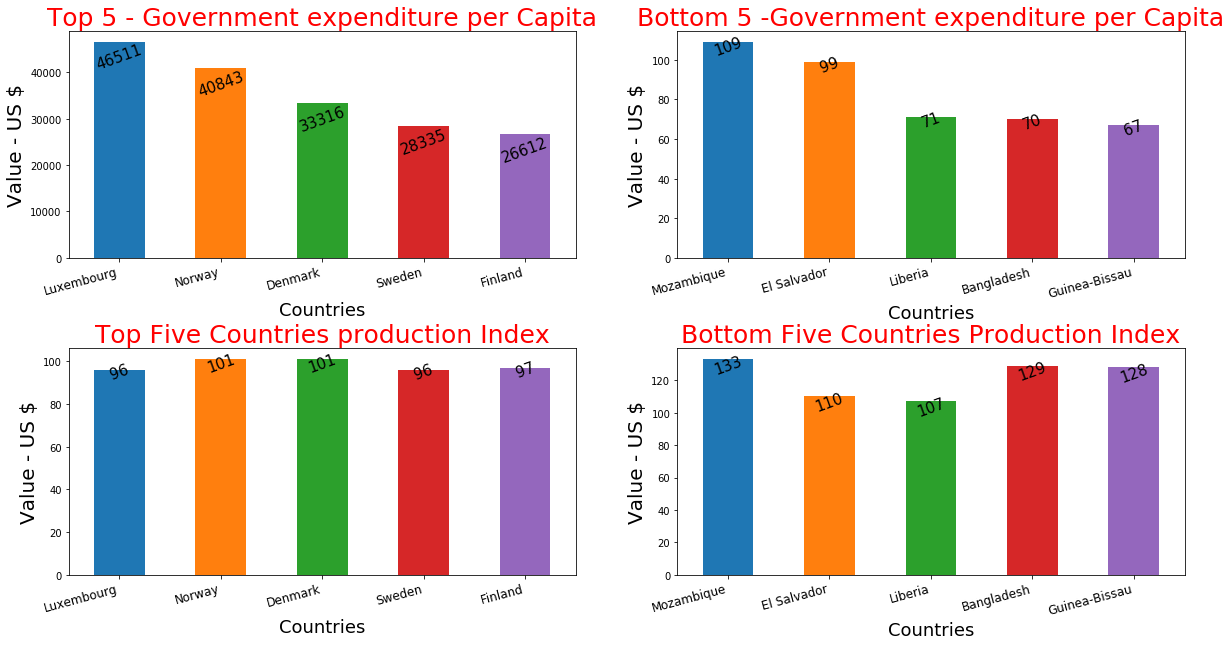

In [12]:
y=['Top 5 - Government expenditure per Capita','Bottom 5 -Government expenditure per Capita','Top Five Countries production Index','Bottom Five Countries Production Index']
graph(top05_expenditure_per_capita,y[0],'Countries','Value - US $',1)
graph(bottom05_expenditure_per_capita,y[1],'Countries','Value - US $',2)
graph(top05_agricultural_index,y[2],'Countries','Value - US $',3)
graph(bottom05_agricultural_index,y[3],'Countries','Value - US $',4)



When viewing the results of the analysis, it appears that while there does not appear to be either a positive or negative correlation between government agricultural expenditure and its productivity index, a more in depth analysis would need to be conducted to determine if this is the case on a larger scale and what factors might impact any correlation.





### Question 3:

#### *Does the amount of Food Aid a nation receives appear to be impacted by the nation’s level of agricultural productivity?*


In [13]:
food_aid_list=[]
for item in uniq_area:
    average_food_aid=0; average_population=0
    sum_food_aid,count_food_aid=filt_food_aid[filt_food_aid["Recipient Country"]==item] .sum()["Value"],filt_food_aid[filt_food_aid["Recipient Country"]==item] .count()["Value"]
    if sum_food_aid != 0  : food_aid_list.append((int(sum_food_aid),item))
top05_food_aid=sorted(food_aid_list,reverse=True)[:5]
bottom05_food_aid=sorted(food_aid_list,reverse=True)[-5:]
print('    Top 5 Countries - Food Aid Recipient ','         |','   Food Aid Recieved ',"\n","-------------------------------------------------------------------------")
for line in top05_food_aid:
    print('\t','{:41}'' |    ''{:10}''  Tonnes'.format(line[1],line[0]))
print('\n',' Bottom 5 Countries - Food Aid Recipient ','        |','   Food Aid Recieved',"\n","-------------------------------------------------------------------------")
for line in bottom05_food_aid:
    print('\t','{:41}'' |    ''{:10}''  Tonnes'.format(line[1],line[0]))
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()

    Top 5 Countries - Food Aid Recipient           |    Food Aid Recieved  
 -------------------------------------------------------------------------
	 Ethiopia                                  |      10630488  Tonnes
	 Sudan (former)                            |       3452656  Tonnes
	 Democratic People's Republic of Korea     |       2480802  Tonnes
	 Somalia                                   |       2352076  Tonnes
	 Kenya                                     |       2249824  Tonnes

  Bottom 5 Countries - Food Aid Recipient          |    Food Aid Recieved 
 -------------------------------------------------------------------------
	 Mexico                                    |           100  Tonnes
	 South Africa                              |            82  Tonnes
	 Panama                                    |            50  Tonnes
	 Belize                                    |            36  Tonnes
	 Romania                                   |            26  Tonnes

  Time Elapsed fo


For this question, we extracted the total 'Food Aid' amount for every nation in tons for each year during the analysis period and then determined the average of this data for each country.

We appended these figures to a list and sorted the list to extract and print the top and bottom 5 Food Aid recipients (excluding countries that received no Food Aid).


In [14]:
top_bottom_food_aid=top05_food_aid+bottom05_food_aid
agricultural_index=[]
for item in top_bottom_food_aid:
    average_agricultural_index=0
    sum_agricultural_index,count_agricultural_index=filt_agricultural_index_nations[filt_agricultural_index_nations["Area"]==item[1]] .sum()["Value"],filt_agricultural_index_nations[filt_agricultural_index_nations["Area"]==item[1]] .count()["Value"]
    if sum_agricultural_index !=0  : average_agricultural_index=sum_agricultural_index/count_agricultural_index
    agricultural_index.append((int(average_agricultural_index),item[1]))
top05_agricultural_index=agricultural_index[:5]
bottom05_agricultural_index=agricultural_index[-5:]
print(' Analysing "International (Food) Aid Received" by countries Vs "Agricultural Production Index" of the same')
print('\n','Countries List : "Highest Aid Recieved by a country"',' |','Agricultural Production Index in $ ',"\n","-------------------------------------------------------------------------------------------")
for line in top05_agricultural_index:
    print('\t','{:40}''      |    ''{:10}''  US $ per capita'.format(line[1],line[0]))
print('\n','Countries List : " Lowest Aid Recieved by a country"',' |','Agricultural Production Index in $ ',"\n","-------------------------------------------------------------------------------------------")
for line in bottom05_agricultural_index:
    print('\t','{:40}''      |    ''{:10}''  US $ per capita'.format(line[1],line[0]))
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()

 Analysing "International (Food) Aid Received" by countries Vs "Agricultural Production Index" of the same

 Countries List : "Highest Aid Recieved by a country"  | Agricultural Production Index in $  
 -------------------------------------------------------------------------------------------
	 Ethiopia                                      |           135  US $ per capita
	 Sudan (former)                                |           102  US $ per capita
	 Democratic People's Republic of Korea         |            99  US $ per capita
	 Somalia                                       |           106  US $ per capita
	 Kenya                                         |           118  US $ per capita

 Countries List : " Lowest Aid Recieved by a country"  | Agricultural Production Index in $  
 -------------------------------------------------------------------------------------------
	 Mexico                                        |           109  US $ per capita
	 South Africa                 



Once again, we extracted the Agricultural Production Index for each country in the analysis and determined the average API for each nation over the duration of the analysis period and printed them. We then display the plots of this data below.



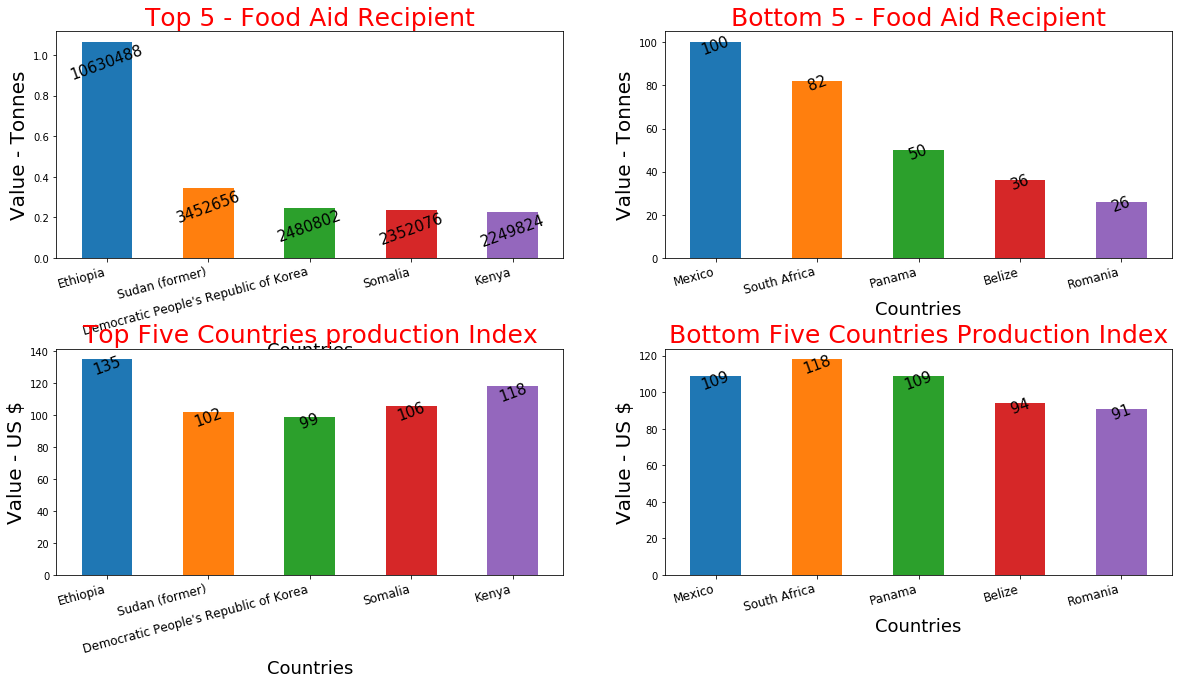

In [15]:
z=['Top 5 - Food Aid Recipient', 'Bottom 5 - Food Aid Recipient','Top Five Countries production Index','Bottom Five Countries Production Index']
graph(top05_food_aid,z[0],'Countries','Value - Tonnes',1)
graph(bottom05_food_aid,z[1],'Countries','Value - Tonnes',2)
graph(top05_agricultural_index,z[2],'Countries','Value - US $',3)
graph(bottom05_agricultural_index,z[3],'Countries','Value - US $',4)


When analyzing the graphs, we can see that there does not appear to be an obvious positive or negative correlation between a country's API and the amount of Food Aid it receives. Note that we used Total Food Aid received (not Food Aid per capita) since the reception of food aid only affects certain segments of each country's population. One might have expected that the higher a country's API, the less likely it would be to receive substantial Food Aid. This appears to be false, however, which could be because a country might have high agricultural output (as in the case of Ethiopia with coffee exports) and yet still require substantial help in the form of Food Aid to provide adequate nutrition to the general population.



### Question 4:

#### *Which countries have the highest rates of agricultural employment, and which countries employ the most females in this sector?* 


Top 10 Countries- Avg. Agricultural Employment     |    Agricultural Employment in %  
 -----------------------------------------------------------------------------------
	 Venezuela (Bolivarian Republic of)        |           100  percentage
	 Benin                                     |            99  percentage
	 Tajikistan                                |            98  percentage
	 Cuba                                      |            93  percentage
	 Italy                                     |            83  percentage
	 Paraguay                                  |            80  percentage
	 Spain                                     |            78  percentage
	 Chile                                     |            78  percentage
	 France                                    |            74  percentage
	 Syrian Arab Republic                      |            72  percentage

  Time Elapsed for the Cell :  0:00:01.545268 - seconds


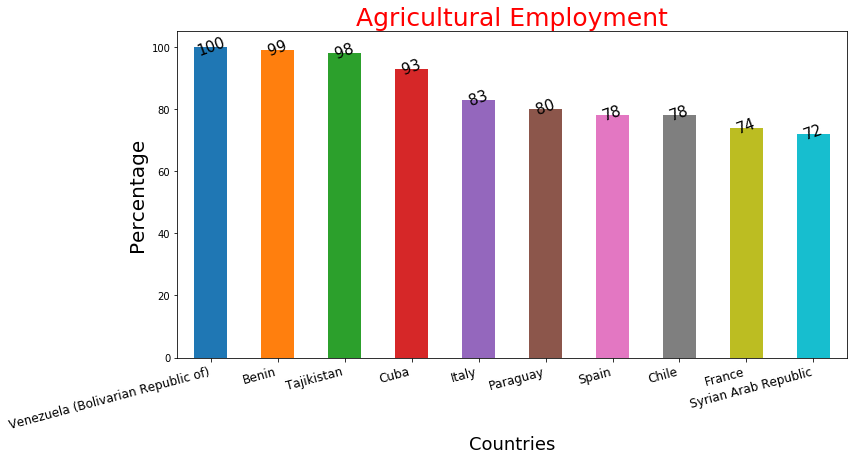

In [16]:
emp_average=[];c=0
while c <= 300:
    sum_values,count_values=filt_emp[filt_emp["Country Code"]==c] .sum()["Value"],filt_emp[filt_emp["Country Code"]==c] .count()["Value"]
    country_name=filt_emp.loc[(filt_emp['Country Code']==c) ,'Country'].values.tolist()
    if sum_values != 0:
        average=int((sum_values/1000*100)/count_values)
        if average != 0 and average <= 100:
            emp_average.append((average,country_name[0]))
    c+=1
top_emp=sorted(emp_average,reverse=True)[:10]
graph(top_emp,'Agricultural Employment','Countries','Percentage',0)
print('Top 10 Countries- Avg. Agricultural Employment','    |','   Agricultural Employment in % ',"\n","-----------------------------------------------------------------------------------")
for line in top_emp:
    print('\t','{:41}'' |    ''{:10}''  percentage'.format(line[1],line[0]))
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()



In this question, we obtained the total number of agricultural employees for each nation and counted them as a number per 1,000 employees. As the data given is per 1000 persons, we derive the 'Average Agricultural Employees' by dividing the total by 1,000 and multiplying by 100. This gives us the average percent of total employment for agriculture for each country.

We then append these figures to a list and sort the list, printing the top 10 countries for agricultural employment as a percent of total employment.


    Top 10 Countries - Female Employees            |    Female Employment in %  
 -----------------------------------------------------------------------------------
	 Tajikistan                                |            54  percentage
	 Benin                                     |            43  percentage
	 Paraguay                                  |            24  percentage
	 Italy                                     |            24  percentage
	 France                                    |            22  percentage
	 Spain                                     |            20  percentage
	 Cuba                                      |            15  percentage
	 Chile                                     |            15  percentage
	 Syrian Arab Republic                      |            12  percentage
	 Venezuela (Bolivarian Republic of)        |             8  percentage

  Time Elapsed for the Cell :  0:00:00.306833 - seconds


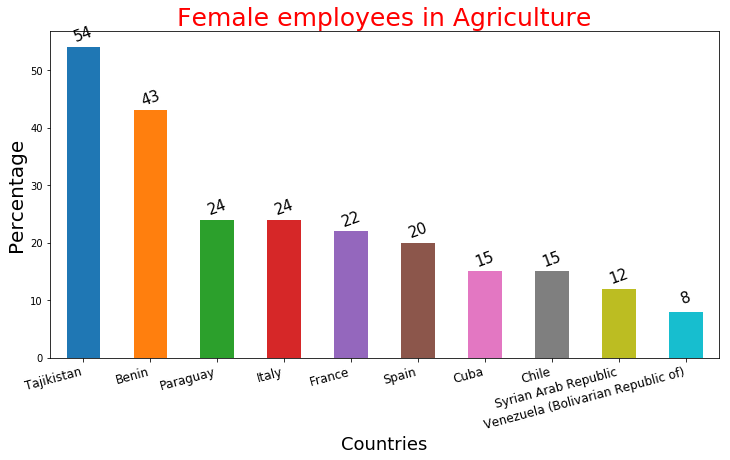

In [17]:
d=1;female_top=[];male_top=[]
for item in top_emp:
    sum_values_female,count_values_female=filt_emp_female[filt_emp_female["Country"]==item[1]] .sum()["Value"],filt_emp_female[filt_emp_female["Country"]==item[1]] .count()["Value"]
    if sum_values_female != 0:
        average=(sum_values_female/1000*100)/count_values_female
        if average >= 0 and average <= 100:
            female_top.append((int(average),item[1]))
top_fem=sorted(female_top,reverse=True)
graph(top_fem,'Female employees in Agriculture','Countries','Percentage',0)
print('    Top 10 Countries - Female Employees','           |','   Female Employment in % ',"\n","-----------------------------------------------------------------------------------")
for line in top_fem:
    print('\t','{:41}'' |    ''{:10}''  percentage'.format(line[1],line[0]))
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()


Among the top 10 countried for agricultural employment, we determined the percent of each country's agricultural employees that are female and printed this list in descending order. We then plotted this data in a graph.


+--------------------------------------+--------+----------+
| Top 10 Countries  Employment Ratio   |   Male |   Female |
|--------------------------------------+--------+----------|
| Venezuela (Bolivarian Republic of)   |     92 |        8 |
| Benin                                |     55 |       43 |
| Tajikistan                           |     43 |       54 |
| Cuba                                 |     77 |       15 |
| Italy                                |     59 |       24 |
| Paraguay                             |     56 |       24 |
| Spain                                |     58 |       20 |
| Chile                                |     62 |       15 |
| France                               |     52 |       22 |
| Syrian Arab Republic                 |     62 |       12 |
+--------------------------------------+--------+----------+


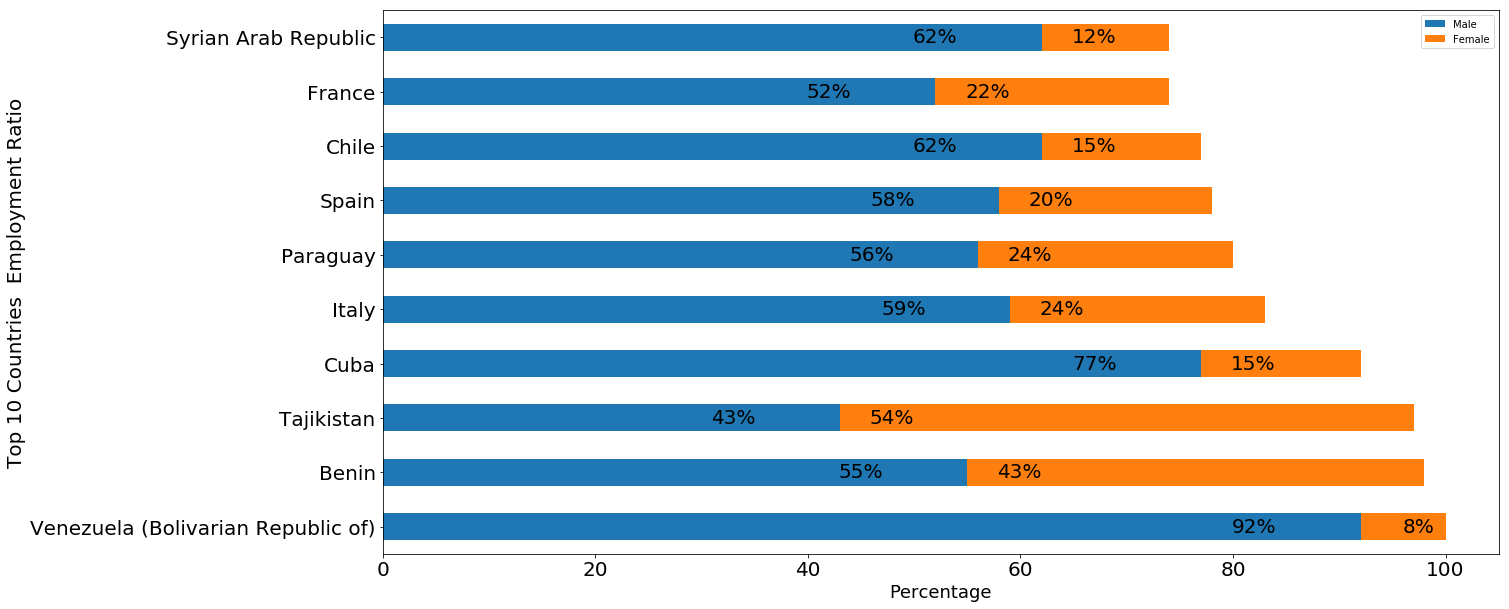


  Time Elapsed for the Cell :  0:00:00.629688 - seconds


In [18]:
ratio_list=[];indexlist=[]
for data in top_emp:
    sum_values_male,count_values_male=filt_emp_male[filt_emp_male["Country"]==data[1]] .sum()["Value"],filt_emp_male[filt_emp_male["Country"]==data[1]] .count()["Value"]
    sum_values_female,count_values_female=filt_emp_female[filt_emp_female["Country"]==data[1]] .sum()["Value"],filt_emp_female[filt_emp_female["Country"]==data[1]] .count()["Value"]
    average_male=int((sum_values_male/1000*100)/count_values_male)
    average_female=int((sum_values_female/1000*100)/count_values_female)
    ratio_list.append((average_male,average_female))
    indexlist.append(data[1])
df = pd.DataFrame(np.array(ratio_list).reshape(10,2), columns =['Male','Female'],index=indexlist)
df.index.name = 'Top 10 Countries  Employment Ratio'
print(tabulate(df, headers='keys', tablefmt='psql'))
fig, ax = plt.subplots(1, 1, figsize=(20,10))
plt.xlabel('Percentage', fontsize=18);plt.ylabel('Country', fontsize=20)
ax.set_xticklabels([i for i in range(0,120,20)], rotation=0, fontsize=20);ax.set_yticklabels(indexlist, rotation=0, fontsize=20)
df.plot.barh(ax=ax,stacked=True)
for i, (p, pr) in enumerate(zip(df.Male, df.Female)):
    plt.text(s=str(p)+"%", x=p-10, y=i, color="Black", verticalalignment="center",horizontalalignment="center",size=20)
    plt.text(s=str(pr)+"%", x=p+7, y=i, color="Black",verticalalignment="center",horizontalalignment="right", size=20)
plt.show()
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()


Next we obtained the total number of both male and female agricultural employees and divided them by the total number of agricultural employees to determine the percent of agricultural employees of each gender. We then printed this data and plotted the stacked bar graph to visually represent the ratio of males to females in these countries.

If we consider these strongly agricultural countries to be representative of agricultural nations in general, we can expect that these ratios would be fairly indicative of male/female ratios in this sector as a whole. When we examine the graph, we see that in general (though not across the board), more males than females are employed in the agricultural sector. While in two of the countries the split was fairly even (Benin and Tajikstan, of whom the latter actually reported more female employees than males), in the rest of the countries, the ratio was closer to 3:1 male-to-female employees reported.




### Question 5:

#### *What are the crops with the highest US production rates and what are their primary uses?*


    Top 5 Countries -  Crop Production             |    Crops Production  
 -----------------------------------------------------------------------------------
	 Cereals - Excluding Beer                  |     397697995  Tonnes
	 Maize and products                        |     316218314  Tonnes
	 Oilcrops                                  |      95282273  Tonnes
	 Soyabeans                                 |      86857268  Tonnes
	 Wheat and products                        |      60417846  Tonnes

  Time Elapsed for the Cell :  0:00:00.697027 - seconds


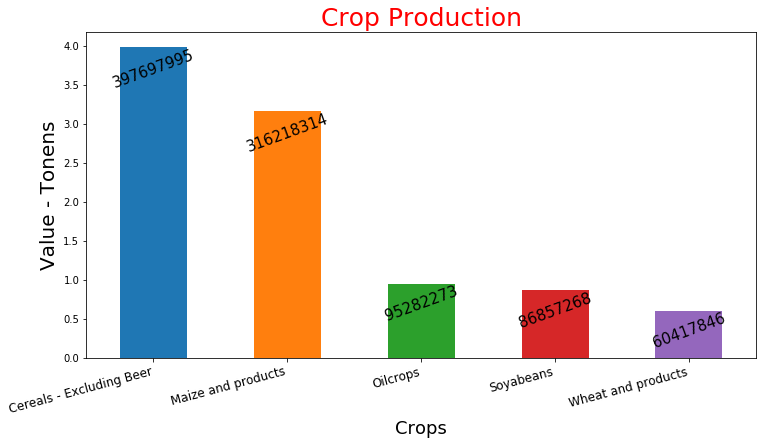

In [19]:
uniq_item=filt_prod_crop.Item.unique()
uniq_element=prod_crop.Element.unique()
top_crop=[]
for item in uniq_item:
    sum_values,count_values=filt_prod_crop[filt_prod_crop["Item"]==item] .sum()["Value"],filt_prod_crop[filt_prod_crop["Item"]==item] .count()["Value"]
    if sum_values!=0:
        average=int(sum_values/count_values)
        top_crop.append((average,item))
top05=sorted(top_crop,reverse=True)[:5]
print('    Top 5 Countries -  Crop Production','            |','   Crops Production ',"\n","-----------------------------------------------------------------------------------")
for line in top05:
    print('\t','{:41}'' |    ''{:10}''  Tonnes'.format(line[1],line[0]))

graph(top05,'Crop Production','Crops','Value - Tonens',0)
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()


In this analysis, we began extracting all of the unique crops listed in the data set. For each crop, we obtained the total amount of the crop's production and derived the average of each over the course of the years in the analysis (2008-2013). 

We then appended this information to a list and sorted the list to calculate, print, and graph the top 5 crops produced in the U.S. during the analysis period.



  Time Elapsed for the Cell :  0:00:00.461267 - seconds


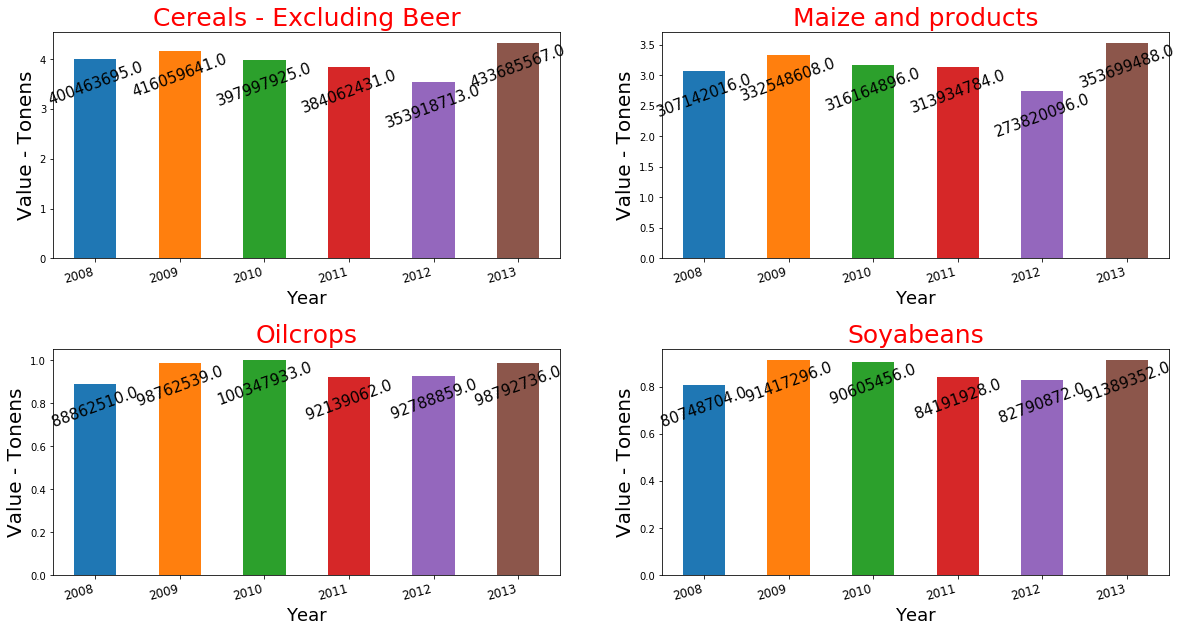

In [20]:
j=1;i=0
for item in top05[:4]:
    yearwise_crop=[];k=0;app=[]
    if k<=4:
        start_year=2008
        while start_year<=2013:
            yearwise_list=0
            yearwise_list=filt_prod_crop.loc[(filt_prod_crop['Year']==start_year) & (filt_prod_crop["Item"] == item[1]) ,'Value'].values.tolist()
            for val in yearwise_list:
                flattened  = val 
            yearwise_crop.append((flattened,start_year))
            start_year+=1;k+=1
        graph(yearwise_crop,item[1],'Year','Value - Tonens',j)
        j+=1
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()


After determining the top crops produced in the US from 2008-2013, we then extract the total production amount for each of these crops for each year in the analysis period and plot these values on graphs.


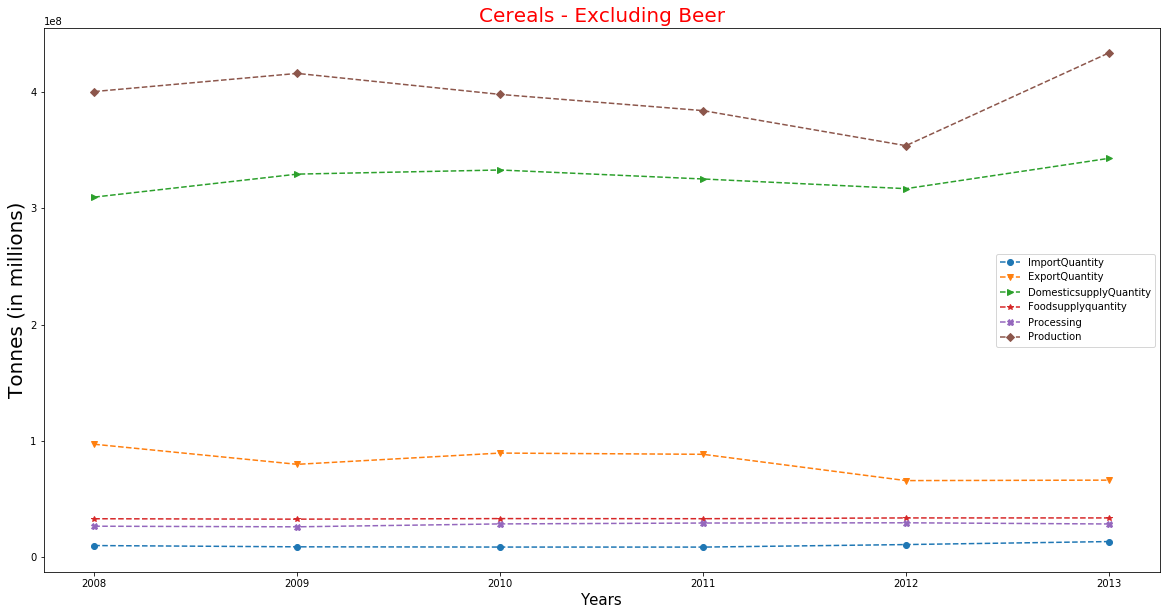

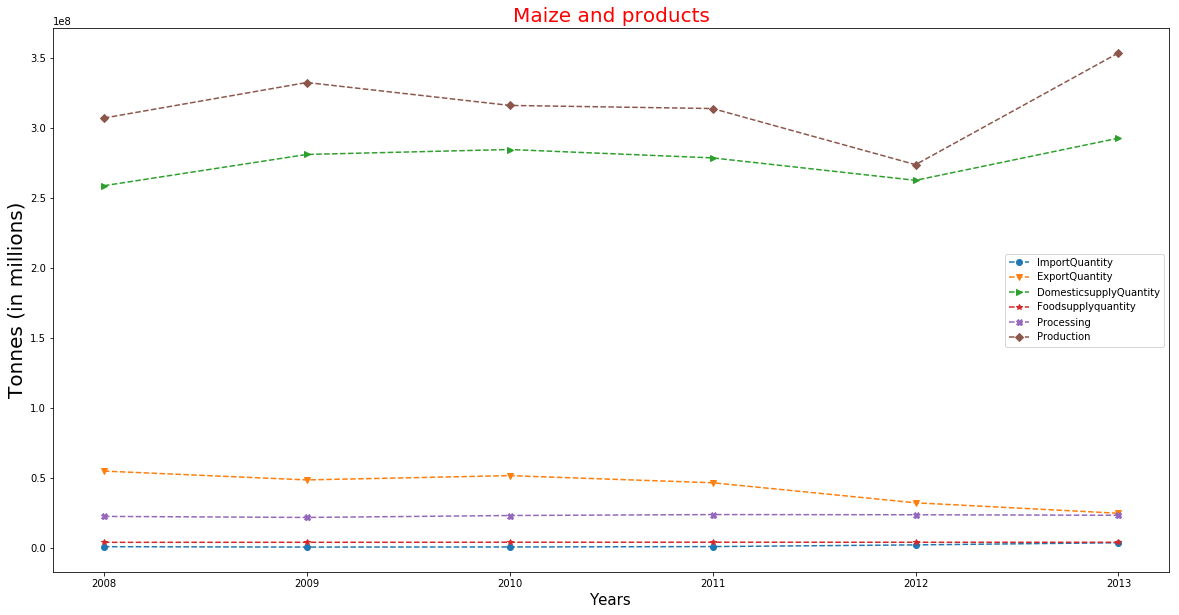

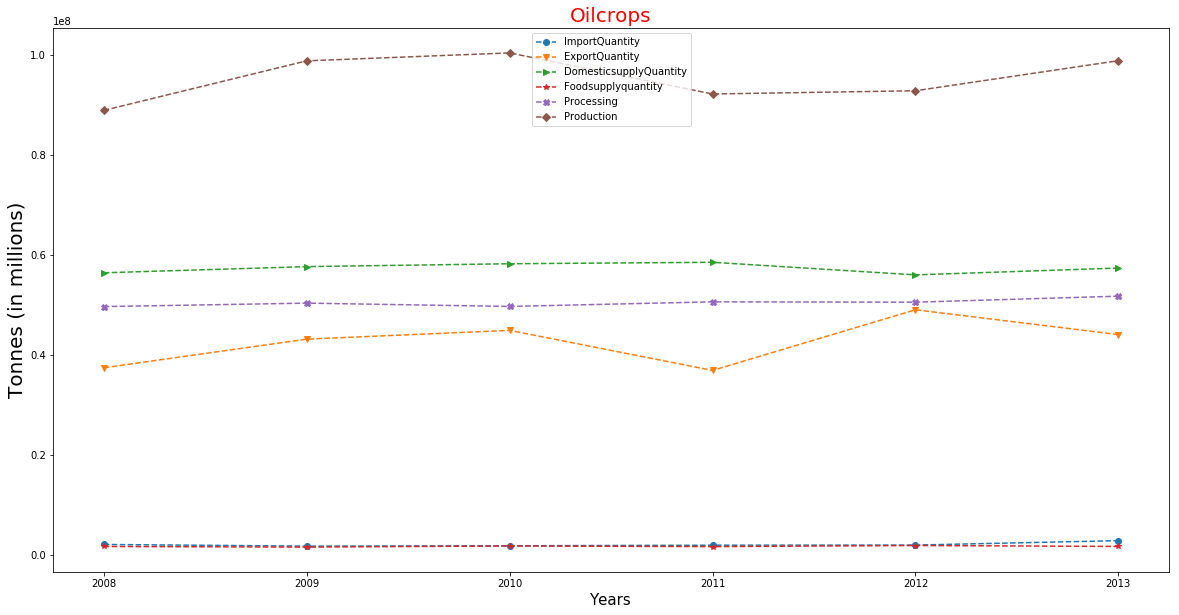

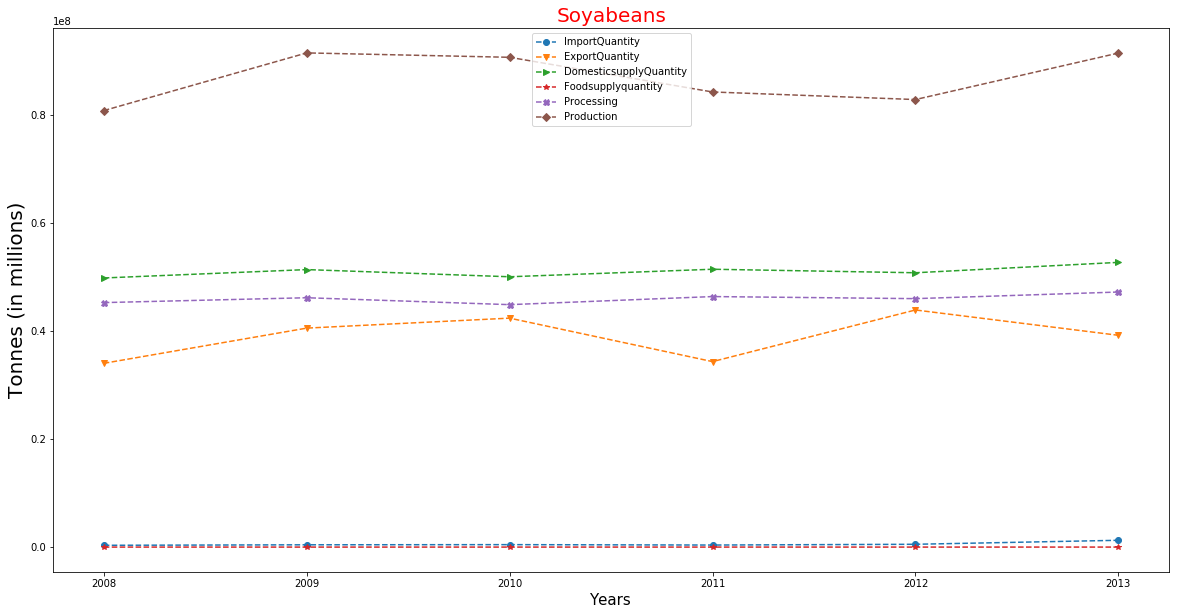

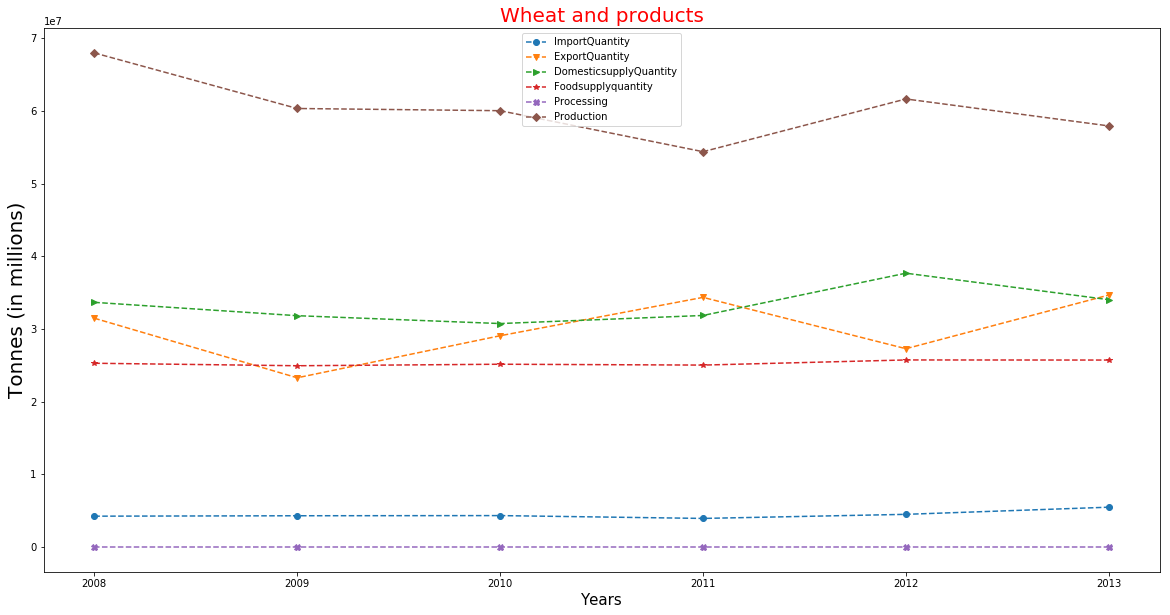


  Time Elapsed for the Cell :  0:00:02.879098 - seconds


In [21]:
uniq_element=filt_element.Element.unique()
data={};k=1
for item in top05:
    k=1
    for dataname in uniq_element:
        start_elementyear=2008;
        distr_list_add=[]
        while start_elementyear<=2013:
            distr_list=filt_element.loc[(filt_element['Year']==start_elementyear) & (filt_element["Item"] == item[1]) & (filt_element["Element"] == dataname) ,'Value'].values.tolist()
            if len(distr_list)==0:distr_list=[0]
            distr_list_add.append((distr_list,start_elementyear));value=[val[0] for val in distr_list_add];year=[val[1] for val in distr_list_add]
            data[k]=list(sum(value,[]))
            start_elementyear+=1
        k+=1
    df=pd.DataFrame({'ImportQuantity':data[1],'ExportQuantity':data[2],'DomesticsupplyQuantity':data[3],'Otheruses':data[4],
                    'Production':data[5],'StockVariation':data[6],'Waste':data[7],'Processing':data[8],'Foodsupplyquantity':data[9],
                      'Feed':data[10],'Seed':data[11]})
    x=np.array([0,1,2,3,4,5]);plt.xticks(x,year)
    plt.plot(df.ImportQuantity,'o--',df.ExportQuantity,'v--',df.DomesticsupplyQuantity,'>--',df.Foodsupplyquantity,'*--',
        df.Processing,'X--',df.Production,'D--')
    plt.legend(['ImportQuantity','ExportQuantity','DomesticsupplyQuantity','Foodsupplyquantity','Processing','Production'])
    plt.xlabel('Years',fontsize=15);plt.ylabel('Tonnes (in millions)',fontsize=20)
    plt.title(item[1],fontsize=20,color='red')
    plt.show()
print('\n',' Time Elapsed for the Cell : ',datetime.now()-start,'- seconds');start=datetime.now()


Finally, for each of the top 5 crops, we extract the quantities of imports, exports, domestic supply, food supply, processing, and production for each of the years from 2008-2013. We then plot this data for each crop on a line graph to illustrate the proportion of each crop that has gone to each purpose.

For cereals (excluding beer), roughly 1/4 of the supply is exported annually, while the rest is used domestically. Small amounts are used for food supply and processing, and only a small quantity is imported annually.

For maize and its products, only a very small amount is exported, while the vast majority is used domestically. None is imported and only a tiny amount is used for food supply. More is used for production, but the majority is used for other purposes.

Oil use is distributed more broadly than the other crops. While domestic use still accounts for the majority of US oil use, over 1/3 of US oil production is exported also. None is used for the food supply, and imports only account for a small proportion of oil use as well. Processing accounts for the vast majority of oil use in the US, as opposed to straight crude oil use.

For soybeans, nearly half of US production is exported, and of that which is used domestically, the majority is used for processing. Virtually no soybeans are exported, and very little is used for the food supply.

Lastly, wheat is the only crop seen thus far that is exported almost as much as it is used domestically and, in fact, was exported more in the years 2011 and 2013. No wheat is used for processing in the US, but a little is imported each year. Furthermore, the vast majority of wheat that is used domestically is used for the food supply.


## *Conclusion*

In [22]:
file_list=(r'C:\Users\mahre\Desktop\project\Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv',r'C:\Users\mahre\Desktop\project\Population_E_All_Data_(Normalized).csv',r'C:\Users\mahre\Desktop\project\Production_Indices_E_All_Data_(Normalized).csv',r'C:\Users\mahre\Desktop\project\Investment_GovernmentExpenditure_E_All_Data_(Normalized).csv',r'C:\Users\mahre\Desktop\project\Food_Aid_Shipments_WFP_E_All_Data_(Normalized).csv',r'C:\Users\mahre\Desktop\project\Employment_Indicators_E_All_Data_(norm).csv',r'C:\Users\mahre\Desktop\project\CommodityBalances_Crops_E_All_Data_(Normalized).csv')
print('                         Files Used for the Project                  ','          |',' How Big the Data is in Raw csv file ',"\n","------------------------------------------------------------------------------------------------------------------------")
for line in file_list:
    num_lines = sum(1 for line in open(line, encoding = "ISO-8859-1"))
    fname = str(line).split('\\')[-1:][0]
    print('\t','{:70}'' |    ''{:10}''  lines '.format(fname,num_lines))
print('\n',' Time Elapsed for the Total Project : ',datetime.now()-eta,' - seconds')

                         Files Used for the Project                             |  How Big the Data is in Raw csv file  
 ------------------------------------------------------------------------------------------------------------------------
	 Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv            |        570491  lines 
	 Population_E_All_Data_(Normalized).csv                                 |        159402  lines 
	 Production_Indices_E_All_Data_(Normalized).csv                         |        556535  lines 
	 Investment_GovernmentExpenditure_E_All_Data_(Normalized).csv           |         55796  lines 
	 Food_Aid_Shipments_WFP_E_All_Data_(Normalized).csv                     |         31115  lines 
	 Employment_Indicators_E_All_Data_(norm).csv                            |         37165  lines 
	 CommodityBalances_Crops_E_All_Data_(Normalized).csv                    |       6585627  lines 

  Time Elapsed for the Total Project :  0:00:26.528777  - seconds


The above is a list of the various files that we used in this analysis. We obtained these files from the United Nations’ Global Food & Agriculture Statistics data set (https://www.kaggle.com/unitednations/global-food-agriculture-statistics/data), which evaluates international land use and farming inputs. Our goal was to explore some of the relationships between various economic indicators across and within national borders in the sphere of agricultural development and productivity. 

After obtaining the data, our next steps were to scrub, explore, and model the data. Once we decided on the relationships we wanted to explore, we looked for messy or missing data. Since this data set was from the UN, it was fairly neat and did not present much of a need for scrubbing. Upon exploring the data, we realized that the most current data was from the year 2013 (not 2015 as we had initally believed) and dated back more than 30 years in most of the annual records. We decided to filter the data to use 2008-2013 as our analysis period and framed our analysis questions around this period's records in the specific measures referenced above. Finally, we explored the relationships present in the data through questions aimed at shaping our understanding of both global economic development in the agricultural sphere and the persistence of poverty and hunger in developing nations across the globe. We modeled the data using a variety of tables and graphs according to which type of model we felt would best depict the story the data told.

Lastly, we interpreted the data that we modeled for each question. In many cases, our interpretation consisted of simply recognizing the apparent presence or absence of a correlation between economic indicators. In other cases, our interpretation involved a more complex analysis of the variables after modeling the data. Overall, we felt this analysis presented us with both an opportunity to practice the analytic process and an experience of how this process has the potential to lead to important insights that could potentially impact global decision-making in any given economic sphere.